In [19]:
import numpy as np

In [4]:
mat1 = np.array([[1,2,3],[4,5,6]])

In [5]:
mat1

array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
mat1[0,:2] 

array([1, 2])

In [10]:
mat2 = np.array([[0.5],[1]])

In [11]:
mat2

array([[0.5],
       [1. ]])

In [12]:
mat3 = 2*mat1

In [13]:
mat3

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [14]:
mat1 + mat2

array([[1.5, 2.5, 3.5],
       [5. , 6. , 7. ]])

In [17]:
mat1 * mat1

array([[ 1,  4,  9],
       [16, 25, 36]])

In [25]:
mat5 = mat1.dot(mat1.T)
mat5

array([[14, 32],
       [32, 77]])

In [33]:
mat6 = mat1.T.dot(mat1)
mat6

array([[17, 22, 27],
       [22, 29, 36],
       [27, 36, 45]])

In [27]:
from numpy import linalg

In [28]:
linalg.inv(mat3) # can only inverse the square matrix

LinAlgError: Last 2 dimensions of the array must be square

In [30]:
mat7 = linalg.inv(mat5)
mat7

array([[ 1.42592593, -0.59259259],
       [-0.59259259,  0.25925926]])

In [32]:
# multiplying matrix with its inverse should give identity matrix
mat5.dot(mat7)

array([[ 1.0000000e+00,  0.0000000e+00],
       [-8.8817842e-16,  1.0000000e+00]])

In [36]:
linalg.inv(mat6) # although mat6 is 3X3, it is not invertible because its rank is 2

LinAlgError: Singular matrix

In [39]:
linalg.inv(mat6[:2,:2]).dot(mat6[:2,:2])

array([[1.00000000e+00, 2.22044605e-15],
       [3.99680289e-15, 1.00000000e+00]])

In [40]:
mat6

array([[17, 22, 27],
       [22, 29, 36],
       [27, 36, 45]])

In [44]:
2*mat6[1,:] - mat6[0,:]

array([27, 36, 45])

In [45]:
mat1

array([[1, 2, 3],
       [4, 5, 6]])

In [46]:
np.transpose(mat1,[1,0])

array([[1, 4],
       [2, 5],
       [3, 6]])

In [50]:
np.transpose(mat1,[1,0])

array([[1, 4],
       [2, 5],
       [3, 6]])

In [59]:
linalg.matrix_rank(mat6)

2

In [64]:
linalg.norm(mat2) # L2 norm

1.118033988749895

In [65]:
linalg.norm(mat2, 'fro') # Frobenius norm. Also called L2 norm

1.118033988749895

In [66]:
linalg.norm(mat2, 2) # L2 norm

1.118033988749895

In [67]:
linalg.norm(mat2, np.inf)

1.0

In [69]:
import scipy
from scipy import spatial

In [70]:
spatial.distance.cosine(mat2,mat2+4)

0.03600738179392626

In [71]:
eigen_val, eigen_vector =  linalg.eig(mat6)
eigen_val

array([9.04026725e+01, 5.97327474e-01, 7.23299057e-16])

In [79]:
x = 5 * np.random.randn(10,2)
y = 5 * x[:,1] + 2 + 0.3 * np.random.randn(10)

In [80]:
xAug = np.concatenate((x, np.ones([10,1])), 1) # Append one for constant

In [81]:
(linalg.inv(xAug.T.dot(xAug)).dot(xAug.T).dot(y))

array([0.05579123, 4.95759681, 2.00543334])

In [1]:
# Gradient Descent

In [2]:
def funct(x,w):
    return w[2]*x*x + w[1]*x + w[0]

def gradient_funct(x,w):
    return 2*w[2]*x + w[1]

In [21]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

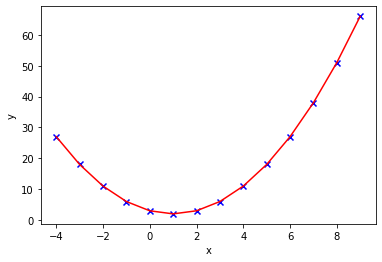

In [10]:
x = np.array([-4,-3,-2,-1,-0,1,2,3,4,5,6,7,8,9])
w = np.array([3, -2, 1])
f = funct(x,w)

plt.scatter(x=x, y=f,c='b', marker='x')
plt.plot(x,f,c='r')
plt.xlabel('x')
plt.ylabel('y')

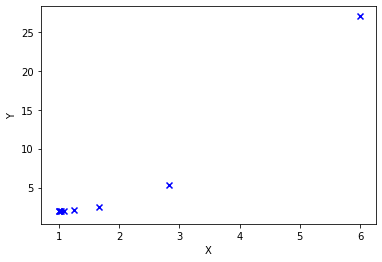

In [14]:
max_terations = 1000
learning_rate = 0.005
min_abs_change = 1e-5
iterations = 0
x=6 # guess
x_series = [x]
while True:
    f = funct(x,w)
    g = gradient_funct(x,w)
    x_new = x - learning_rate*g
    if(iterations > max_terations):
        break
    if(np.sum(abs(x_new-x)) < min_abs_change):
        break
    if(iterations % (max_terations/10) == 0):
        plt.scatter(x,f,c='b', marker='x')
        plt.plot(x,f,c='r')
        plt.xlabel('X')
        plt.ylabel('Y')
    iterations += 1
    x = x_new
    
    x_series = np.concatenate((x_series,[x]))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


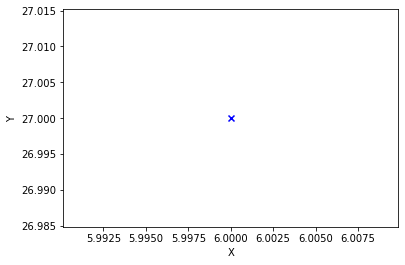

In [17]:
# Adam optimizer
x = 6
alpha = 0.1
beta1 = 0.9
beta2 = 0.9
min_abs_change = 1e-4
max_iter = 1000
m = 0*x
v = 0*x
epsilon = 10e-8
x_series = [x]

iterations = 0
while True:
    f = funct(x,w)
    g = gradient_funct(x,w)
    m = beta1 * m + (1-beta1) * g
    v = beta2 * v + (1-beta2) * g * g
    m_hat = m/(1-np.power(beta1,iterations))
    v_hat = v/(1-np.power(beta2,iterations))
    x_new = x - alpha * m_hat/np.sqrt(v_hat+epsilon)
    
    if(np.sum(abs(x_new - x)) < min_abs_change):
        break
    if(iterations > max_iter):
        break
    
    if(iterations%(max_iter/2) == 0):
        plt.scatter(x,f,c='b', marker='x')
        plt.plot(x,f,c='r')
        plt.xlabel('X')
        plt.ylabel('Y')
    
    iterations+=1
    x = x_new
    x_series = np.concatenate((x_series,[x]))

In [18]:
x_series

array([ 6., nan, nan, ..., nan, nan, nan])

In [20]:
# Simple Loss and Grdient Descent

In [24]:
def model_linear(x,w):
    return w[1] * x + w[0]

def loss_MSE(f,y):
    return np.sum(np.square(f-y)) / np.size(f)

def loss_MAE(f,y):
    return np.sum(np.abs(f-y)) / np.size(f)

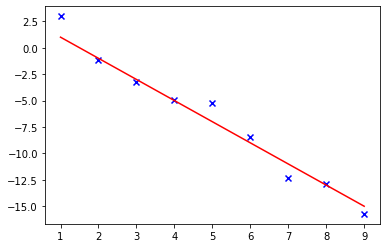

In [26]:
x = np.array([1,2,3,4,5,6,7,8,9])
w_ideal = np.array([3, -2])
y = w_ideal[1] * x + w_ideal[0] + 0.9*np.random.randn(np.size(x))

w = w_ideal
f = model_linear(x,w)

plt.scatter(x, y, c='b', marker='x')
plt.plot(x, f, c='r')
plt.show()

In [28]:
loss = loss_MSE(f, y)
loss

1.0654485727070493

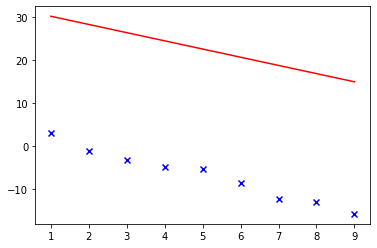

In [31]:
w = np.array([32, -1.9])
f = model_linear(x, w)
plt.scatter(x,y,c='b', marker='x')
plt.plot(x,f,c='r')
plt.show()

In [32]:
loss_MSE(f, y)

858.3060911706673

In [33]:
x = np.append(x, [10])
y = np.append(y, [100])

f = model_linear(x,w)
loss_MSE(f,y)

1529.3754820536005

In [39]:
# Perform gradient descent
def gradient_descent(w, x, y):
    x1 = np.vstack((x, np.ones_like(x)))
    f = w.dot(x1).flatten()
    error = (y.flatten() - f)
    gradient = -(1.0/len(x)) * x1.dot(error)
    return gradient, f

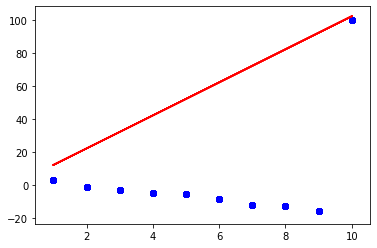

In [40]:
w = np.array([10,2.1])
learning_rate = 0.0005
min_abs_change = 1e-5
max_iter = 10000

iterations = 0
while True:
    gradient, f = gradient_descent(w, x, y)
    w_new = w - learning_rate * gradient
    
    if(np.sum(abs(w_new - w)) < min_abs_change):
        break
    if(iterations > max_iter):
        break
    if(iterations % (max_iter/10) == 0):
        plt.scatter(x, y, c='b')
        plt.plot(x,f,c='r')
    iterations += 1